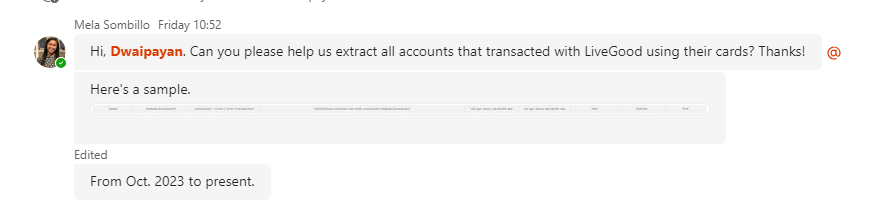

# <div align="center" style="color: #ff5733;">LIVEGOOD Transactions</div>

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)

In [2]:
sq = """SELECT a1.ubcustomercode,a1.accountid, a.narration, a.debitcreditflag, a.code, a.postingdate,  a.amount, a.transactiondate  
FROM `prj-prod-dataplatform.finastra_raw.transactiondetails` a
join finastra_raw.account a1 on a1.ACCOUNTID=a.ACCOUNTPRODUCT_ACCPRODID
WHERE TIMESTAMP_TRUNC(a.postingdate, DAY) >= TIMESTAMP("2023-10-01")
and lower(a.narration) like '%livegood%'"""

In [3]:
df = client.query(sq).to_dataframe(progress_bar_type='tqdm')
df.shape

Job ID 16a924eb-44bd-4237-91d4-0ffd255b5b85 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(2766, 8)

In [5]:
df.to_csv("Livegood.csv", index = False)